## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

0. Повторение лекции + а зачем все это?
1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

####  0. Повторение лекции + а зачем все это?

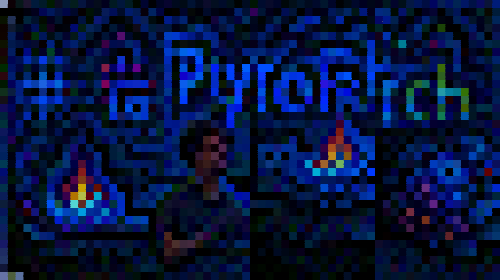

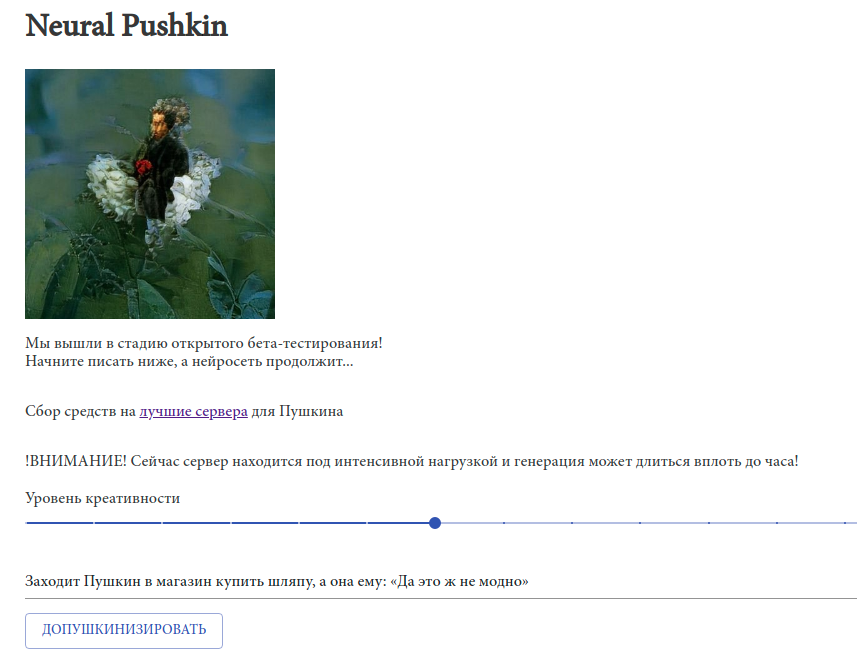

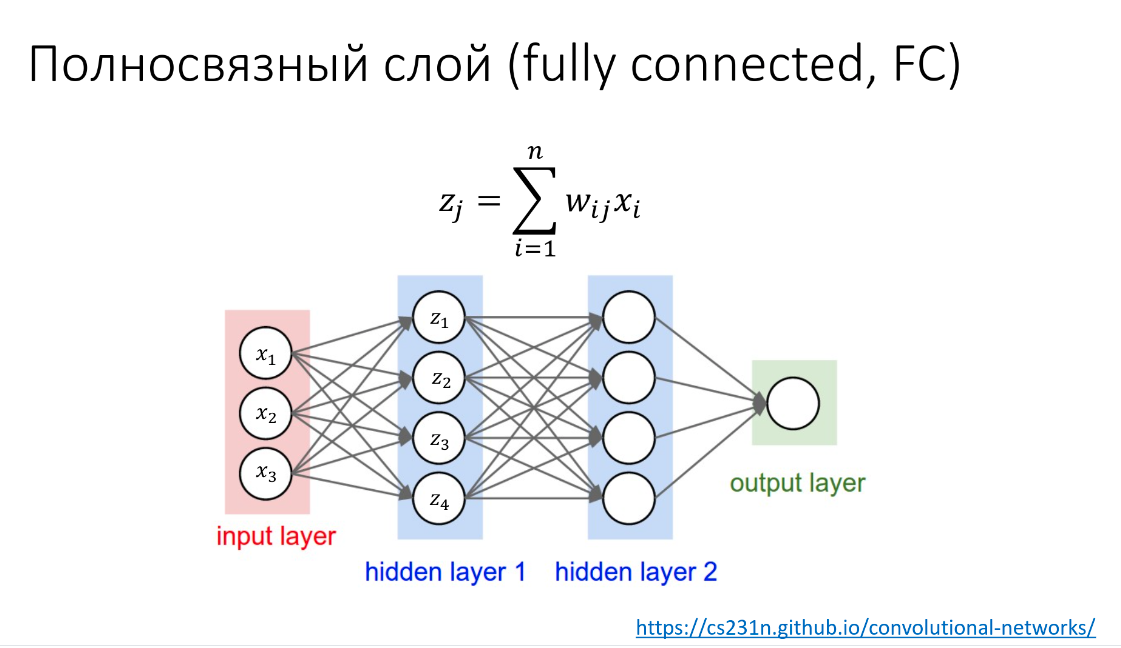

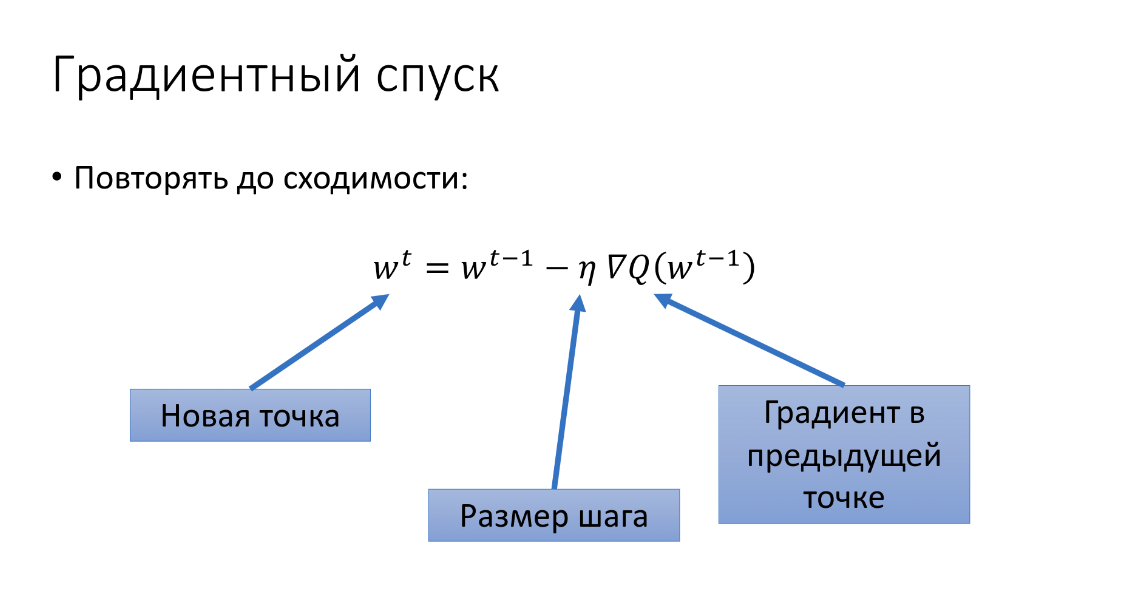

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[8.51415564e-04, 7.53099199e-01, 5.30616915e-01],
       [8.59159543e-02, 1.25865268e-02, 6.18015820e-01],
       [2.83975352e-01, 5.80160489e-01, 4.39573529e-01],
       [2.35632312e-02, 5.50313476e-01, 7.17358144e-02],
       [8.73885555e-01, 4.85897453e-01, 5.48010014e-01]])

In [3]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [4]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.00085142 5.7530992  5.53061692]
 [5.08591595 5.01258653 5.61801582]
 [5.28397535 5.58016049 5.43957353]
 [5.02356323 5.55031348 5.07173581]
 [5.87388555 5.48589745 5.54801001]]



In [5]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[0.84871344 0.3374817  0.67040533 0.45252494 0.65745641]
 [0.3374817  0.38948353 0.30336361 0.05328486 0.41987533]
 [0.67040533 0.30336361 0.61045308 0.35749468 0.77095116]
 [0.45252494 0.05328486 0.35749468 0.30854617 0.32729943]
 [0.65745641 0.41987533 0.77095116 0.32729943 1.30008727]]



In [6]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.42818918 0.23883943 0.43456979 0.21520417 0.63593101]



In [7]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [11]:
np.sum(np.arange(1,10001)**2) 

333383335000

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [20]:
x = torch.rand(5, 3)
x

tensor([[0.3017, 0.8225, 0.4795],
        [0.6286, 0.8917, 0.3205],
        [0.4697, 0.4300, 0.5276],
        [0.3784, 0.4379, 0.1148],
        [0.8311, 0.5937, 0.5795]])

In [ ]:
### Linear ... -> conv ... ??? print(mat.shape)

In [21]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [25]:
# 5,4,3,8
x.size(0)

5

In [26]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.3017, 5.8225, 5.4795],
        [5.6286, 5.8917, 5.3205],
        [5.4697, 5.4300, 5.5276],
        [5.3784, 5.4379, 5.1148],
        [5.8311, 5.5937, 5.5795]])



In [ ]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

In [28]:
# np.dot()
torch.matmul(x, x.transpose(1, 0))

tensor([[0.9975, 1.0767, 0.7483, 0.5294, 1.0169],
        [1.0767, 1.2929, 0.8478, 0.6651, 1.2375],
        [0.7483, 0.8478, 0.6839, 0.4266, 0.9514],
        [0.5294, 0.6651, 0.4266, 0.3481, 0.6410],
        [1.0169, 1.2375, 0.9514, 0.6410, 1.3790]])

In [33]:
a = torch.rand((10, 20, 20, 30))
a.shape

torch.Size([10, 20, 20, 30])

In [42]:
a.mean(dim=-1).shape

torch.Size([10, 20, 20])

In [ ]:
# (10, 256, 256) -> (10, 20); (p1, p2 .... p20) -> max(dim=-1) -> (10, 1), где 1 max вероятность

In [43]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.5346, 0.6136, 0.4758, 0.3104, 0.6681])



In [44]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



In [48]:
x.transpose(0, -1) # x.size = (3,5)
# 5,3 3,5
# view -> 15

tensor([0.3017, 0.8225, 0.4795, 0.6286, 0.8917, 0.3205, 0.4697, 0.4300, 0.5276,
        0.3784, 0.4379, 0.1148, 0.8311, 0.5937, 0.5795])

In [56]:
np.random.rand(4,5,4) # tensor размером 4,5,4

array([[[0.13037144, 0.83660963, 0.51017887, 0.26541129],
        [0.48700271, 0.45012565, 0.85140402, 0.61988372],
        [0.29357365, 0.89661987, 0.12565002, 0.97398836],
        [0.13744041, 0.36989611, 0.51627165, 0.30555937],
        [0.00518625, 0.29826946, 0.21396991, 0.3973842 ]],

       [[0.20871278, 0.69424256, 0.37919595, 0.78777015],
        [0.89468636, 0.17937692, 0.52701051, 0.42019786],
        [0.32811005, 0.34018213, 0.24174095, 0.24740292],
        [0.53875772, 0.43789128, 0.2894908 , 0.24411667],
        [0.31394491, 0.35934475, 0.89615681, 0.35307871]],

       [[0.88478408, 0.35997777, 0.50987014, 0.99764784],
        [0.71451534, 0.50760631, 0.31802373, 0.12010614],
        [0.80067393, 0.39169933, 0.75936498, 0.6491903 ],
        [0.13446495, 0.49213509, 0.12083542, 0.829116  ],
        [0.68387234, 0.53128109, 0.55496625, 0.18011413]],

       [[0.85152392, 0.90487704, 0.83024407, 0.25482965],
        [0.22807534, 0.43974933, 0.46423014, 0.20019229],
        

In [ ]:
# 10 картинок и каждая размеро 256*256
tensor(10, 3, 256, 256) # 10*3*256*256

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [63]:
torch.sum(torch.arange(1,10001)**2).item()  # 1 число -> питоновский типа

333383335000

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [64]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[1.4393e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.8395e+25, 6.1963e-04],
        [5.2059e+22, 2.6427e+20, 3.3790e+21],
        [6.7357e+22, 1.6985e-07, 8.3895e-07],
        [1.4393e-36, 0.0000e+00, 1.4393e-36]])


In [65]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.6246, 0.4790, 0.0531],
        [0.4333, 0.9259, 0.7832],
        [0.9320, 0.9032, 0.9266],
        [0.1483, 0.1977, 0.6379],
        [0.2626, 0.0540, 0.6388]])


In [70]:
x = torch.zeros(5, 3, dtype=torch.int16) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)


In [81]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [93]:
x = x.new_ones(5, 3, dtype=torch.float) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) torch.Size([5, 3])


In [94]:
y = torch.rand(5, 3)
print(x + y) # операция сложение

tensor([[1.7404, 1.9176, 1.3990],
        [1.6307, 1.1701, 1.2212],
        [1.0208, 1.3044, 1.1112],
        [1.4129, 1.5323, 1.7965],
        [1.9750, 1.4372, 1.5508]])


In [95]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[1.7404, 1.9176, 1.3990],
        [1.6307, 1.1701, 1.2212],
        [1.0208, 1.3044, 1.1112],
        [1.4129, 1.5323, 1.7965],
        [1.9750, 1.4372, 1.5508]])


In [96]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[1.7404, 1.9176, 1.3990],
        [1.6307, 1.1701, 1.2212],
        [1.0208, 1.3044, 1.1112],
        [1.4129, 1.5323, 1.7965],
        [1.9750, 1.4372, 1.5508]])


In [97]:
x.shape, y.shape

(torch.Size([5, 3]), torch.Size([5, 3]))

In [101]:
print((x * y).shape) # поэлементное умножение

torch.Size([5, 3])


In [99]:
# print(x @ y.t()) # матричное умножение

In [102]:
print((x.mm(y.t())).shape) # и опять матричное умножение

torch.Size([5, 5])


In [104]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 

torch.Size([1, 5, 3])


In [105]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


In [111]:
x.shape

torch.Size([5, 3])

In [119]:
x.unsqueeze(1).shape

torch.Size([5, 1, 3])

In [ ]:
# (10, 256, 256)

Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [120]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

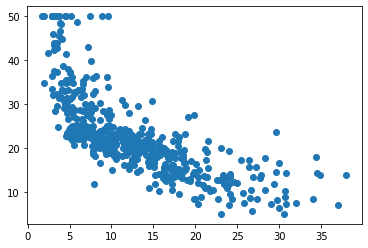

In [122]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью /параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

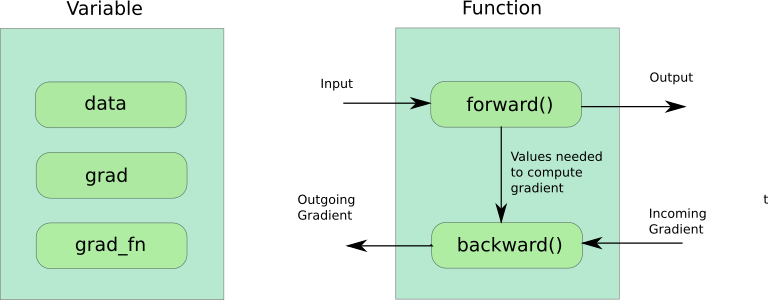

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [127]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [129]:
y_pred = w * x + b                 # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами
loss.backward()                    # считаем градиенты

In [130]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.9868])
dL/db = 
 tensor([-43.7498])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [131]:
w.data

tensor([0.6436])

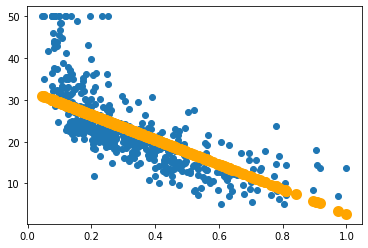

loss =  39.96086


In [133]:
from IPython.display import clear_output

for i in range(500):

    # w.grad is None
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward() # -> посчитались градиенты 

    # w.grad is **not** None
    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [134]:
### Мой идейный пример:

class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    # нужен объект номер idx=157
    def __getitem__(self, idx):
        
        # каталог с картинками img_0001 ...
        path = "img_00" + ind + ".jpg"
        #read pic
        sample = torch.tensor(pic)  # (3, 1080, 1920)
        # csv ответы
        ans = pd.csv(...)[idx]
        
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [135]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [138]:
x

array([[0.39571628, 0.59754235, 0.91519225, 0.84712139, 0.9453668 ],
       [0.04927912, 0.44661929, 0.99168914, 0.22587351, 0.18469878],
       [0.43343101, 0.66863061, 0.33391851, 0.41496019, 0.20492638],
       ...,
       [0.20691549, 0.06095061, 0.30922089, 0.50366784, 0.45953435],
       [0.82184759, 0.75259287, 0.94568621, 0.30581252, 0.51937986],
       [0.14130017, 0.10950689, 0.37597639, 0.28190835, 0.50347668]])

In [136]:
our_dataset = RandomDataset(x, y)

In [139]:
our_dataset.__getitem__(1)

tensor([0.0493, 0.4466, 0.9917, 0.2259, 0.1847])

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [ ]:
# from torch.utils.data import DataLoader

In [141]:
torch.utils.data.DataLoader??

In [142]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4, num_workers=4, pin_memory=True) # gpu 

In [ ]:
# batch_size -> больше (но <= 1024)
# dataloader -> 2 -> еще больше не выйдет

```
Это: (10, 256, 256) -> (10, 256*256) * (256*256)

Быстрее(!!!) Чем это:

10 раз: 
    (256, 256) -> (256*256) * (256*256)
```

Работают с Dataloader следующим образом:

In [ ]:
our_dataset.__getitem__(5)

In [144]:
for batch in dataloader:
    # (batch_size, data_size 5)
    batch_x = batch['sample']
    batch_y = batch['target']
    
    output = net(batch_x)
    loss = loss(output, batch_y)
    
    
    
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.2207, 0.1881, 0.0472, 0.9539, 0.3663],
        [0.2069, 0.0610, 0.3092, 0.5037, 0.4595],
        [0.8218, 0.7526, 0.9457, 0.3058, 0.5194],
        [0.1413, 0.1095, 0.3760, 0.2819, 0.5035]])
Target: tensor([0.1458, 0.8128, 0.0811, 0.0969], dtype=torch.float64)


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

#### Способ 1:

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(5, 3)  # 5*3 штук
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(3, 1)
        
        
    def forward(self, x):
        # x тензор (bs, ...)
        return self.layer2(self.relu(self.layer1(x)))
    
        # как вариант: 
        # x = self.relu(self.layer1(x))
        # return self.layer2(x)

#### Способ 2:

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        model_net = nn.Sequential(
          nn.Linear(5, 3),
          nn.ReLU(),
          nn.Linear(3, 1)
        )

        
    def forward(self, x):
        # x тензор (bs, ...)
        return self.layer2(self.relu(self.layer1(x)))

#### Способ 3:

In [145]:
model = nn.Sequential()                 # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU())       # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

##### Примерчик:

In [149]:
batch_x

tensor([[0.2207, 0.1881, 0.0472, 0.9539, 0.3663],
        [0.2069, 0.0610, 0.3092, 0.5037, 0.4595],
        [0.8218, 0.7526, 0.9457, 0.3058, 0.5194],
        [0.1413, 0.1095, 0.3760, 0.2819, 0.5035]])

In [148]:
y_pred = model(batch_x) # получили предсказания модели
y_pred

tensor([[-0.2187],
        [-0.2239],
        [-0.2083],
        [-0.2285]], grad_fn=<AddmmBackward>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [ ]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки

mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

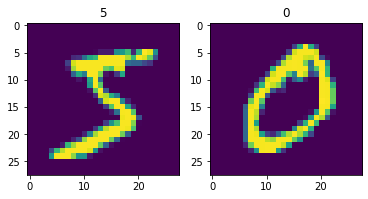

In [151]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
# ответы это 0-9 => class 

In [167]:
bmodel = nn.Sequential(
    nn.Flatten(),        # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),           # функция активации рел
    nn.Linear(128, 10),  # последний слой размером 128 нейронов с выходом 10 нейронов
    # (batch_size, 10) -> (batch_size, 10) --Softmax--> (bs, 10), но 10 не случайных чисел, а вероятностей от 0 до 1^
    # -> (batch_size, (0.1, ..., 0.8, 0.03 ...))
    nn.Softmax(dim=-1)   # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

In [ ]:
# w -= 0.05 * w.grad  -- не надо. Это за нас будет делать oprimizer! 

In [ ]:
# 1) Простой способ: SGD с шагом 0.05
# 2) Более хитрый: первые 3 эпохи делать шаг 0.1, потом 0.05, потом еще меньше (torch scheduler)
# 3) Поговорим на следующих семинарах: torch.optim.Adam() - прикидывает сам шаг градиента какой лучше взять

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [156]:
!pip install wandb --upgrade --quiet
import wandb

wandb.login()

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


wandb: Currently logged in as: kirili4ik (use `wandb login --relogin` to force relogin)


True

In [157]:
wandb.init(project="pytorch-demo")  # инициализируем проект
wandb.watch(model)                  # сохраняем параметры сетки в wandb + просим следить за градиентами сетки
print()

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [ ]:
# Идея:

# 1) Сделали датасет (как доставать 1 объект)
# 2) Dataloader -> по сколько объединять объекты из датасета
# 3) Создали сетку 
# wandb + 4) Пишем цикл train_epoch + val_epoch


# Как вариант для домашки: 

# def train_epoch(...):
#     for batch in train_loader: ...

# @torch.no_grad()
# def validate(...):
#    for batch in val_loader: ...


# Как вариант для тренировки:

for epoch in range(11): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)

    # это train_epoch():
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        # for batch in train_dataloader:
        # x_train, y_train = batch
        
        # x_train: (bs, 28, 28) -> (bs, 784) -> ... Linear -> .... (bs, 10)
        y_pred = model(x_train)                       # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)       # считаем лосс
        # grad is None now (Или нули)
        loss.backward()                               # считаем градиенты обратным проходом
        # grad is not None
        optimizer.step()                              # обновляем параметры сети
        # по всем параметрам: w -= lr*w.grad
        optimizer.zero_grad()                         # обнуляем посчитанные градиенты параметров
        # по всем параметрам модели: w.grad = 0
    
    
    # это ~ validation()
    if epoch % 2 == 0:
        val_loss = []      # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):       # берем батч из вал лоадера
                y_pred = model(x_val)                       # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)       # считаем лосс
                val_loss.append(loss.numpy())               # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        # печатаем метрики
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(val_loss), accuracy=np.mean(val_accuracy)
        ))

Примерно так это выглядит:

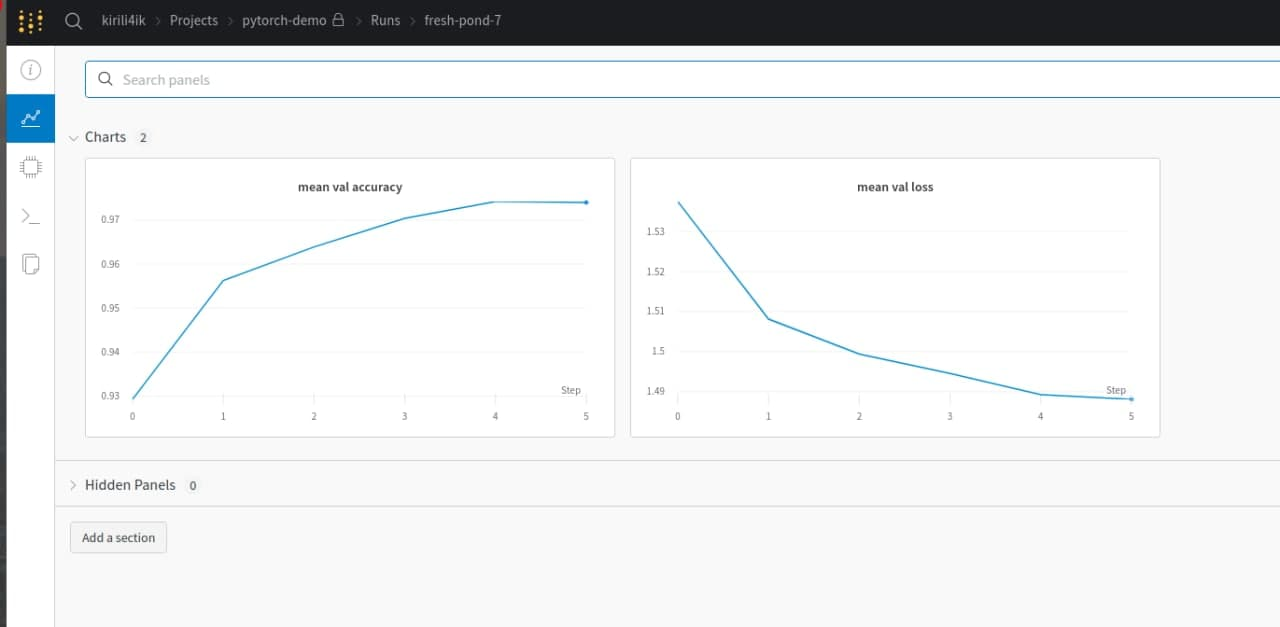

### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)